In [14]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree 
from sklearn.metrics import accuracy_score
from sklearn.tree import export_text


In [16]:
import matplotlib.pyplot as plt

Accuracy: 0.8


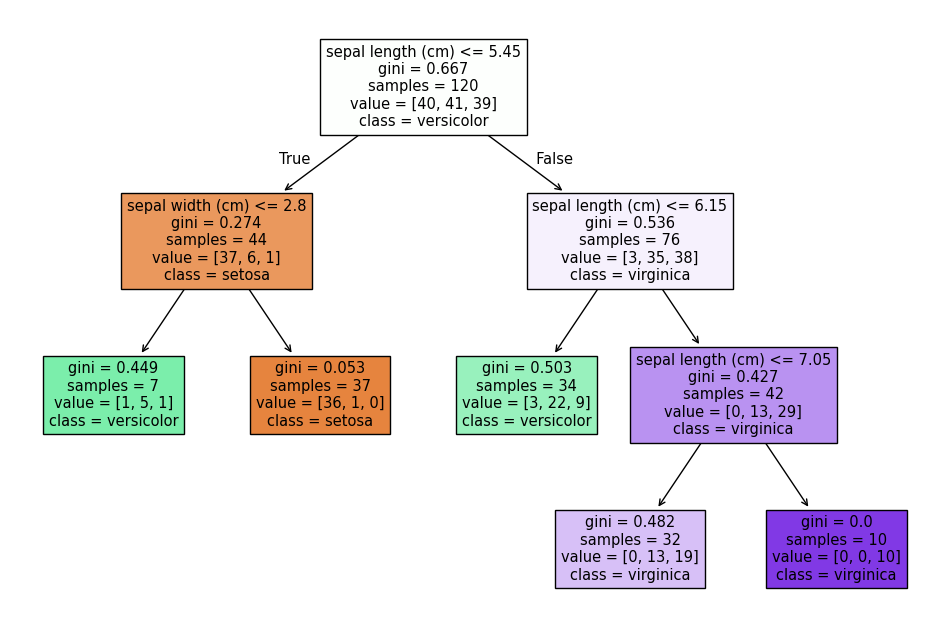

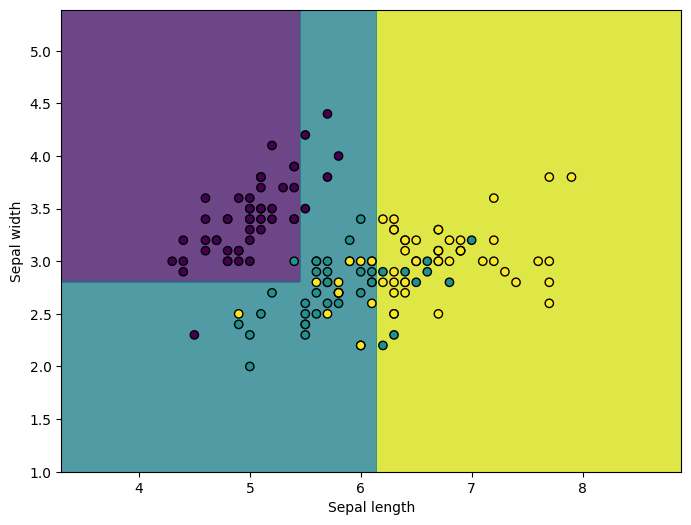

In [25]:
# Load iris dataset
iris = load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=3,min_samples_split=40)
clf.fit(X_train, y_train)

# Check accuracy
y_pred = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=iris.feature_names[:2], class_names=iris.target_names)
plt.show()

# Plot the decision boundary
plt.figure(figsize=(8, 6))
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()


In [26]:
r = export_text(clf, feature_names=['sepal_length','sepal_width'])
print(r)

|--- sepal_length <= 5.45
|   |--- sepal_width <= 2.80
|   |   |--- class: 1
|   |--- sepal_width >  2.80
|   |   |--- class: 0
|--- sepal_length >  5.45
|   |--- sepal_length <= 6.15
|   |   |--- class: 1
|   |--- sepal_length >  6.15
|   |   |--- sepal_length <= 7.05
|   |   |   |--- class: 2
|   |   |--- sepal_length >  7.05
|   |   |   |--- class: 2



In [19]:
clf.feature_importances_

array([0.83569313, 0.16430687])

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23748\720697854.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01)[:, np.newaxis]


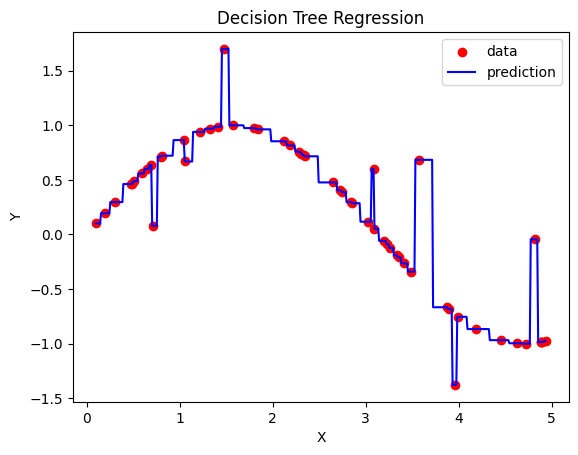

In [21]:

from sklearn.tree import DecisionTreeRegressor
# Generate a non-linear dataset based on the sine function
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - np.random.rand(16))  # add some noise to the data

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit a Decision Tree regressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

# To plot the regression curve, we'll sort the X values and predict Y values for the sorted X
X_grid = np.arange(min(X), max(X), 0.01)[:, np.newaxis]
y_grid = regressor.predict(X_grid)

# Plot the training data and the regression curve
plt.scatter(X_train, y_train, color='red', label='data')
plt.plot(X_grid, y_grid, color='blue', label='prediction')
plt.title('Decision Tree Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


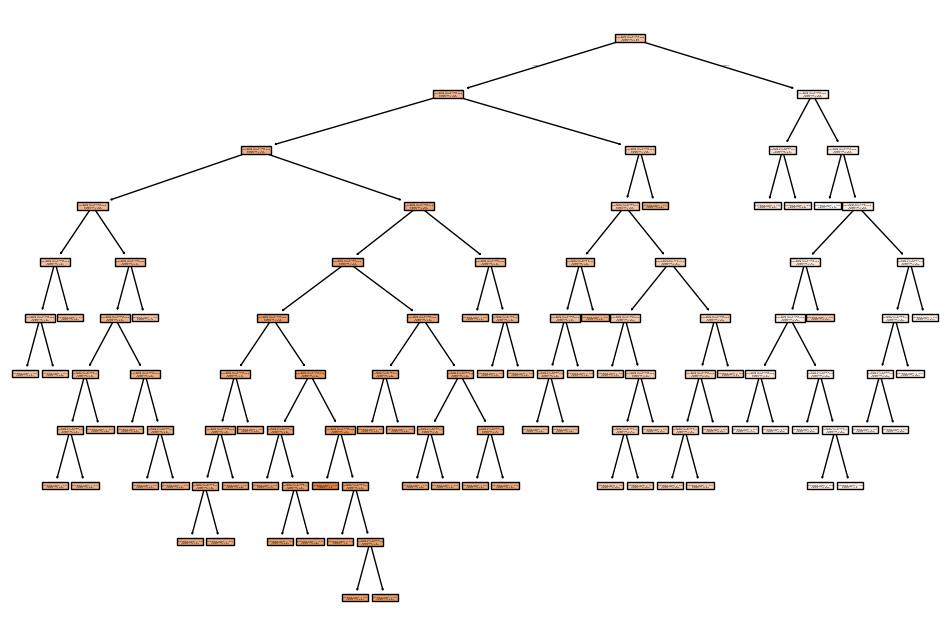

In [22]:
from sklearn.tree import plot_tree
# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(regressor, filled=True)
plt.show()